# Medical insurance dataset analysis

The course I am doing has a mini project involving this dataset, to keep my learning notes clean I have put my work on the project in a separate notebook.


In [129]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Looking at the top 5 rows of the dataset we can see columns of the following types; integers, floats, binary categories and multiple categories. The categorical data will need to be sorted and the floats and integers may also need some level of transformation.

Before these are transformed empty values should be checked and dealt with.

In [130]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No empty values, perfect.

Work can begin on exploring these variables

In [131]:
# Summary statistics of numerical vars
print(insurance.describe())

# Value counts of categorical
cols_to_count = ['sex', 'smoker', 'region']
for col in cols_to_count:
    print(f'---- {col} ----')
    print(insurance[col].value_counts())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
---- sex ----
male      676
female    662
Name: sex, dtype: int64
---- smoker ----
no     1064
yes     274
Name: smoker, dtype: int64
---- region ----
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Initial exploration shows that the numerical variables may have a normal distribution, except the charges variable. Since the mean and medians are similar. The slight differences may also show the direction of skew in each of these variables.

The categorical data also shows some signs of cleanliness as the only variable with radically different value counts for its classes is the smoker category with a difference of 790 between them. This will have to be carefully monitored as leaving too few in the training set may cause in accuracies when predicting smokers charges.

<AxesSubplot:xlabel='age', ylabel='Count'>

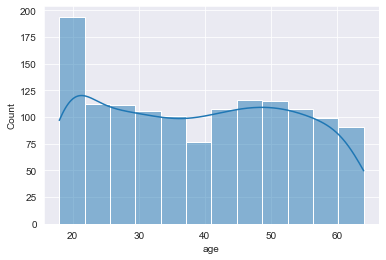

In [132]:
sns.histplot(data=insurance, x='age', kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

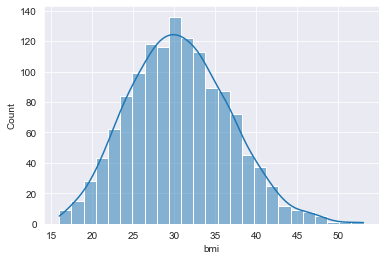

In [133]:
sns.histplot(data=insurance, x='bmi', kde=True)

<AxesSubplot:xlabel='children', ylabel='Count'>

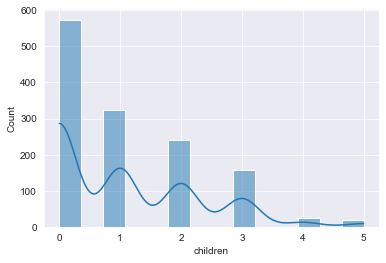

In [134]:
sns.histplot(data=insurance, x='children', kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

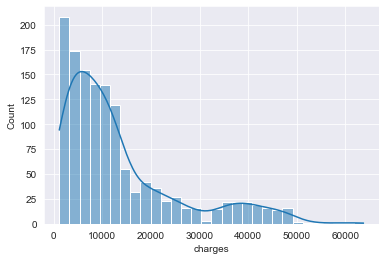

In [135]:
sns.histplot(data=insurance, x='charges', kde=True)

My initial thoughts about the distributions have proved to be false, for all but bmi. This is because I did not assume the distibutions would be so far from normal.

These variables that are not normally distributed will have to be normalised through some method.

## Exploring relationships between the dependent and independent
### Categorical variables

<AxesSubplot:xlabel='charges', ylabel='sex'>

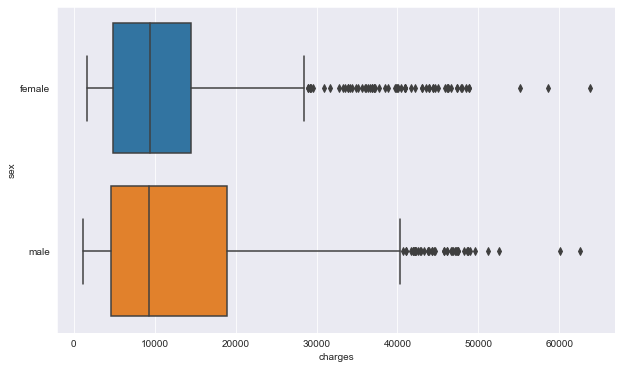

In [136]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=insurance,
    y='sex', x='charges'
)

Shows a difference in the distribution of charges, but the medians and lower quantile remain similar. The biggest difference in the distributions between the sexes is the inter-quantile range and the upper limit. Men appear to have a larger than of most probable charges than women, and a higher upper limit.

<AxesSubplot:xlabel='charges', ylabel='smoker'>

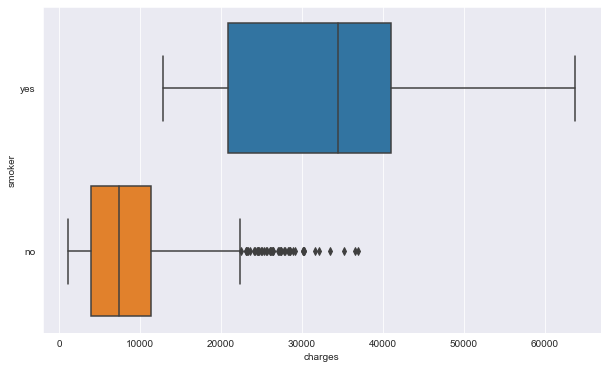

In [137]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=insurance,
    y='smoker', x='charges'
)

This difference is huge. This will be a hugely influential variable for predicting charges. The biggest aspect that draws the eye is that 75% of the non-smoker data doesn't even touch the smoker distribution, this means naively that if we just used this variable we have a good probability of a correct prediction of correct band of charges they will be in.

<AxesSubplot:xlabel='charges', ylabel='region'>

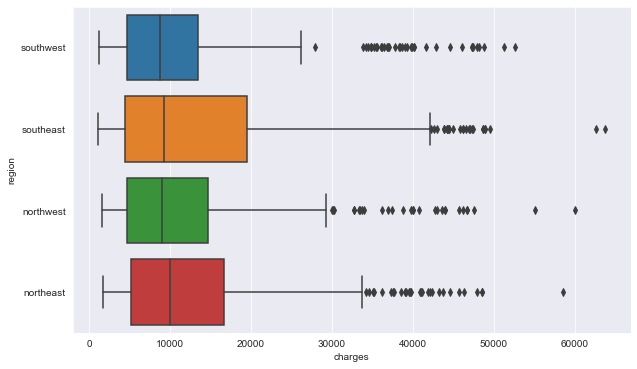

In [138]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=insurance,
    y='region', x='charges'
)

Differences in the regions are limited to the distribution of the charges with some being larger than others. The southeast region has by far the largest distribution.

### Numerical variables

<AxesSubplot:xlabel='age', ylabel='charges'>

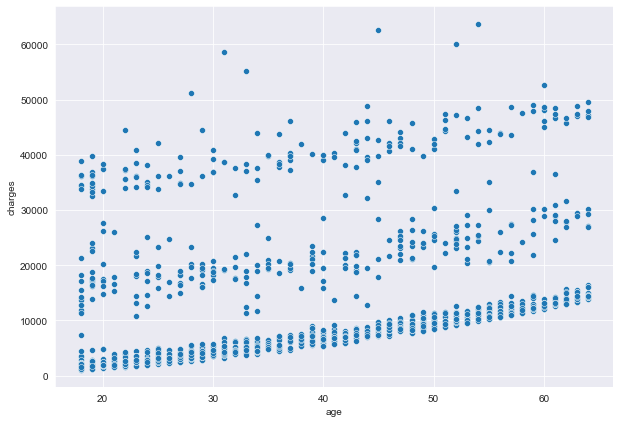

In [139]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=insurance,
    x='age', y='charges'
)

The relationship between charges and age is clear, as age increases so does that of the charges. This relationship also looks fairly linear.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

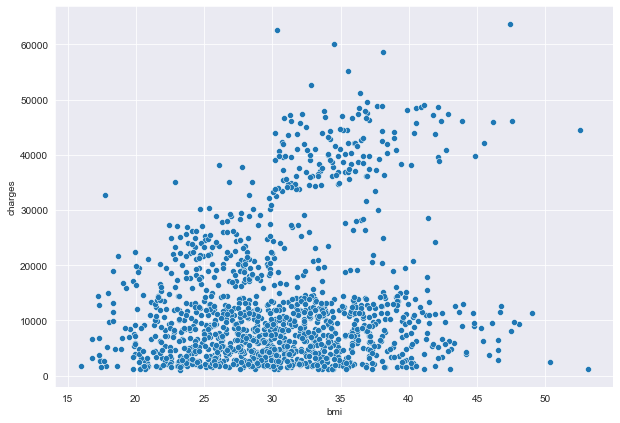

In [140]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=insurance,
    x='bmi', y='charges'
)

Another positive relationship, as bmi increase so does charges. However, this time the relationship is also less consistent other the whole set.

<AxesSubplot:xlabel='children', ylabel='charges'>

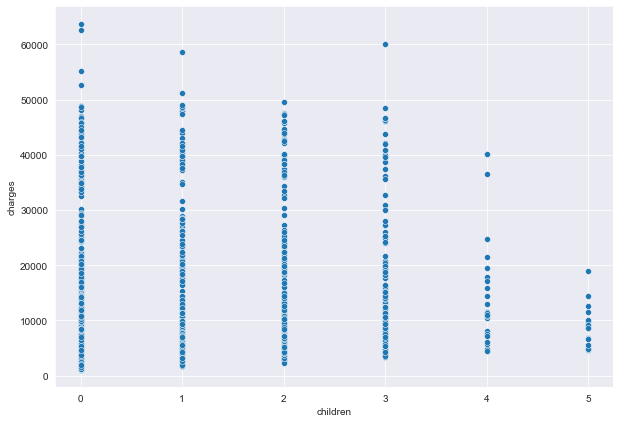

In [141]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=insurance,
    x='children', y='charges'
)

This is our first negatively correlated relationship, as the number of children goes up the charges go down.

## Transforming our data for modelling

In [142]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [143]:
# Split insurance into a test and train set
train, test = train_test_split(
    insurance,
    train_size=0.8,
    random_state=42
)

In [144]:
# Transform the binary category variables into 1 and 0 values
train.replace(['yes', 'male'], 1, inplace=True)  # 1 replacer
train.replace(['no', 'female'], 0, inplace=True)  # 0 replacer

test.replace(['yes', 'male'], 1, inplace=True)  # 1 replacer
test.replace(['no', 'female'], 0, inplace=True)  # 0 replacer

In [145]:
# Transform the multiple category variables into one hot encoded format
train = pd.get_dummies(
    data=train,
    prefix='',
    prefix_sep=''
)

test = pd.get_dummies(
    data=test,
    prefix='',
    prefix_sep=''
)

The distributions of the variables vary and thus require different transformation techniques to use them for neural networks. The variable bmi requires standardization as it is already normally distributed, but all others require normalisation.

Since neural networks are affected by varying scales I will normalise my data between -1 and +1 to keep with the same scale as the other variable.

In [165]:
# Transform variables into better input and outputs for a neural network to learn from

## Init transformers
stdScaler = StandardScaler()
mmScaler = MinMaxScaler(feature_range=(-1, 1))

## Fit transform values in training set
train['bmi'] = stdScaler.fit_transform(train['bmi'].to_numpy().reshape(-1, 1))
train[['age', 'children', 'charges']] = mmScaler.fit_transform(
    train[['age', 'children', 'charges']]
)

## Transform values in test set
test['bmi'] = stdScaler.transform(test['bmi'].to_numpy().reshape(-1, 1))
test[['age', 'children', 'charges']] = mmScaler.transform(
    test[['age', 'children', 'charges']]
)


## Modelling our neural network

First model will have an input layer of equivalent size to the dataset, and only one hidden layer with the same number of units as the input. The Output layer will obviously contain only 1 unit. The model will train for 100 epochs.

In [171]:
# Create model
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(9, input_shape=[9], name='Input_Layer'),
        tf.keras.layers.Dense(100, name='Hidden_Layer_1'),
        tf.keras.layers.Dense(1, name='Output_Layer')
    ]
)

# Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Fit the model
model_1.fit(train.drop(columns=['charges']), train.charges, epochs=100)

Epoch 1/100


2022-08-07 13:49:10.478999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 2s 17ms/step - loss: 0.4501 - mae: 0.4501
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2519 - mae: 0.2519
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1696 - mae: 0.1696
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1309 - mae: 0.1309
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1277 - mae: 0.1277
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1283 - mae: 0.1283
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1264 - mae: 0.1264
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1226 - mae: 0.1226
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1271 - mae: 0.1271
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1233 - mae: 0.1233
Epoch 11/100
34/34 [==============================] - 0s 4ms/step - lo

9/9 [==============================] - 0s 2ms/step


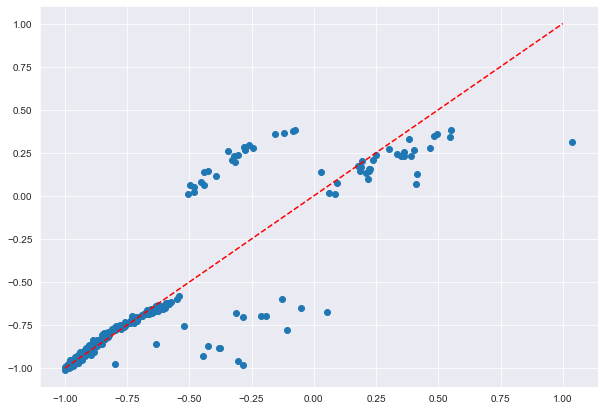

In [176]:
# Evaluate model
y_pred = model_1.predict(test.drop(columns=['charges']))

plt.figure(figsize=(10,7))
plt.scatter(test.charges, y_pred)
plt.plot([-1, 1], [-1, 1], '--', c='red')